In [2]:
Load_Optimizer = 1
if Load_Optimizer == 1:

  from google.colab import files

#   print("Need to upload ATM_With_Primary_Axis1.py " )
  print("Please Uplaod:      Adaptive_Two_Mode_Optimizer_For_Colab.py")
  src = list(files.upload().values())[0]
#   open('ATM_With_Primary_Axis1.py','wb').write(src)
  open('Adaptive_Two_Mode_Optimizer_For_Colab.py','wb').write(src)
  
  
  # import mylib



Please Uplaod:      Adaptive_Two_Mode_Optimizer_For_Colab.py


Saving Adaptive_Two_Mode_Optimizer_For_Colab.py to Adaptive_Two_Mode_Optimizer_For_Colab (1).py


In [3]:
!pip install scipy
!pip install cma

In [4]:

# coding: utf-8

# In[1]:

import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cma
import Adaptive_Two_Mode_Optimizer_For_Colab as Adaptive_Two_Mode_Optimizer


# In[3]:


def fun(x): 
    return np.sum((1000000**(np.arange(D)/D))*((x-X_Optimal)**2) )


D = 2
remaining_evals = 10000*D
Number_Of_Tests = 3
test_Optimization = 1


SOLVER = Adaptive_Two_Mode_Optimizer.Adaptive_Two_Mode

print("Now running example optimization test on f2 - on a Budget of 10000*D:")
print()
for test in range (Number_Of_Tests):
    print("round ",test+1,":")
    x0 = 10*(np.random.rand(D)-0.5)
    X_Optimal = 10*(np.random.rand(D)-0.5)
    print("Initial Cost",fun(x0))

    ## This is the first method of calling the optimizer
    Best_Parameters_After_Optimization = Adaptive_Two_Mode_Optimizer.optimize(fun, x0, remaining_evals )
    ## This is the second method of calling the optimizer
    Best_Parameters_After_Optimization = SOLVER.Optimize(fun, x0, remaining_evals )
    
    print("Final Cost",fun(Best_Parameters_After_Optimization))
    print()
    
print("All Done")



Finished Loading:  Adaptive_Two_Mode

Now running example optimization test on f2 - on a Budget of 10000*D:

round  1 :
Initial Cost 1461.271532454528
Final Cost 5.573580007088858e-23

round  2 :
Initial Cost 1100.7054638206494
Final Cost 5.2933040056873025e-25

round  3 :
Initial Cost 5781.590112512463
Final Cost 1.7235977612199484e-22

All Done


0






###############################################################################
Now running the short test 
This is just to check the code is working properly
Because it only examines low dimensions - there shouldn't be much difference in the runtime
To see the big difference - run the next block : the long test (about 10-15 mins)
###############################################################################






Running 8 Timing Tests:
Testing the following numbers of optimizable variables:
[   8   31   78  159  283  459  694 1000]

----------------------------------------------------------


----------------------------------------------------------
Dimensionality_test  0

Initialization Test:  0
Initialization Test:  1
Initialization Test:  2
----------------------------------------------------------


----------------------------------------------------------
Dimensionality_test  1

Initialization Test:  0
Initialization Test:  1
Initialization Test:  2
------------------

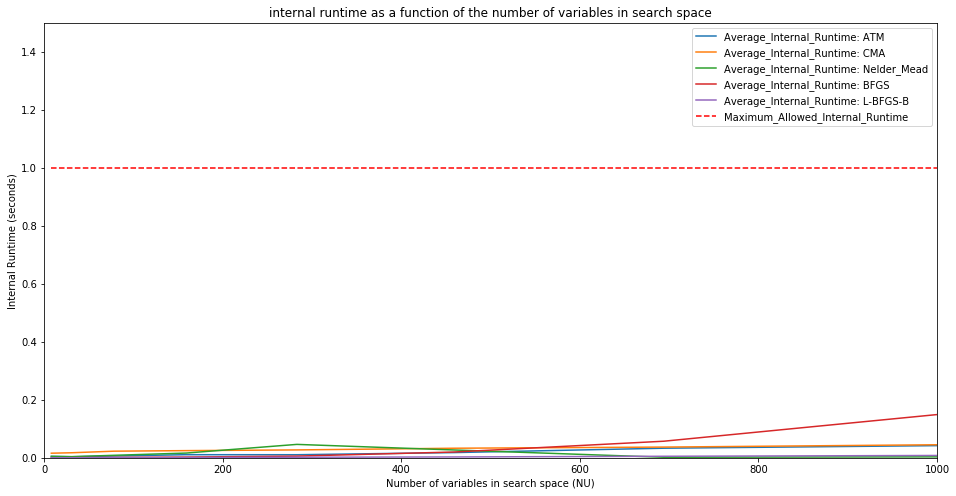

In [5]:


# D = 5
# remaining_evals = 2048
Number_Of_Tests = 3
test_Optimization = 1


Function_Evaluation_Time = 0

print(Function_Evaluation_Time)
def fun(x): 
    t1 = time.time()

    f = np.sum((x-X_Optimal)**2)
    

    global Function_Evaluation_Time 
    Function_Evaluation_Time += (time.time() - t1)
    return f






Run_CMA_Timing_Test = 1
Run_Nelder_Mead_Timing_Test = 1
Run_ATM_Timing_Test = 1
Run_BFGS_Timing_Test = 1
Run_L_BFGS_B_Timing_Test = 1


Dimensionality_test = -1
remaining_evals = 512






print()
print()
print()
print()
print()
print()
print("###############################################################################")
print("Now running the short test ")
print("This is just to check the code is working properly")
print("Because it only examines low dimensions - there shouldn't be much difference in the runtime")
print("To see the big difference - run the next block : the long test (about 10-15 mins)")
print("###############################################################################")
print()
print()
print()
print()
print()
print()


Sqrt3_Dimensionality_Vector = np.linspace(2,10,8)   ##### This is for the short test
# Sqrt3_Dimensionality_Vector = np.linspace(2,50,100) ##### This is for the Full test
Maximum_Allowed_Time_For_Evaluation = 1.0


Dimensionality_Vector = np.arange(len(Sqrt3_Dimensionality_Vector))
for i in range(len(Sqrt3_Dimensionality_Vector)): 
    Dimensionality_Vector[i] = int(Sqrt3_Dimensionality_Vector[i]**3)


Maximum_reached_dimensionallity_test_ATM = len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_CMA= len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_Nelder_Mead= len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_BFGS= len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_L_BFGS_B= len(Dimensionality_Vector)

Average_Internal_Runtime_ATM = np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_Nelder_Mead= np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_CMA= np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_BFGS= np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_L_BFGS_B= np.zeros(len(Dimensionality_Vector))


print("Running " + str(len(Dimensionality_Vector)) + " Timing Tests:")
print("Testing the following numbers of optimizable variables:")
print(Dimensionality_Vector)
print()
for Dimensionality_test in range(len(Dimensionality_Vector)):
    D = Dimensionality_Vector[Dimensionality_test]
    print("----------------------------------------------------------")
    print()
    print()
    print("----------------------------------------------------------")
    print("Dimensionality_test ",Dimensionality_test)
    print()

    for test in range (Number_Of_Tests):
      
        print("Initialization Test: ", test)
      
        Function_Evaluation_Time = 0

        x0 = 10*(np.random.rand(D)-0.5)
        X_Optimal = 10*(np.random.rand(D)-0.5)



        ### Timing CMA Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_CMA[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_CMA_Timing_Test = 0
                Maximum_reached_dimensionallity_test_CMA = Dimensionality_test

        if Run_CMA_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization = cma.fmin(fun, x0, 10**-12 ,
                       options=dict( maxfevals=remaining_evals,
                                    verb_log=0, verb_disp=0, verbose=-9))

            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_CMA[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)



        
        
        
        ### Timing Nelder Mead Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_Nelder_Mead[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_Nelder_Mead_Timing_Test = 0
                Maximum_reached_dimensionallity_test_Nelder_Mead = Dimensionality_test
                
        if Run_Nelder_Mead_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization = optimize.fmin(fun, x0, maxfun = remaining_evals ,full_output = False)

            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_Nelder_Mead[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
        
        
        
        
        ### Timing ATM Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_ATM[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_ATM_Timing_Test = 0
                Maximum_reached_dimensionallity_test_ATM = Dimensionality_test
                
        if Run_ATM_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization = Adaptive_Two_Mode_Optimizer.optimize(fun, x0, remaining_evals )

            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_ATM[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
        

        ### Timing BFGS Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_BFGS[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_BFGS_Timing_Test = 0
                Maximum_reached_dimensionallity_test_BFGS = Dimensionality_test
                
        if Run_BFGS_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization =   optimize.minimize(fun, x0, args=(), method='BFGS',\
                                                                 jac=None, tol=None, callback=None, 
                                                                 options={'gtol': 1e-05, 
                                                                          'eps': 1.4901161193847656e-08, 'maxiter': remaining_evals, 'disp': False, 'return_all': False})

            
#      
#             Best_Parameters_After_Optimization = optimize.minimize(fun, x0, args=(), method='L-BFGS-B', jac=None, bounds=None, tol=None, 
#                                                  callback=None, options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 
#                                                     'gtol': 1e-05, 'eps': 1e-08, 'maxfun': remaining_evals, 'maxiter': remaining_evals, 'iprint': -1, 'maxls': 20})
              
            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_BFGS[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
            
            
            
            
            
             ### Timing L-BFGS-B Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_L_BFGS_B[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_L_BFGS_B_Timing_Test = 0
                Maximum_reached_dimensionallity_test_L_BFGS_B = Dimensionality_test
                
        if Run_L_BFGS_B_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()


#      
            Best_Parameters_After_Optimization = optimize.minimize(fun, x0, args=(), method='L-BFGS-B', jac=None, bounds=None, tol=None, 
                                                 callback=None, options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 
                                                    'gtol': 1e-05, 'eps': 1e-08, 'maxfun': remaining_evals, 'maxiter': remaining_evals, 'iprint': -1, 'maxls': 20})
              
            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_L_BFGS_B[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
            
            
### find the fit parameters


plt.figure(figsize = (16,8))
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_ATM],Average_Internal_Runtime_ATM[:Maximum_reached_dimensionallity_test_ATM])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_CMA],Average_Internal_Runtime_CMA[:Maximum_reached_dimensionallity_test_CMA])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_Nelder_Mead],Average_Internal_Runtime_Nelder_Mead[:Maximum_reached_dimensionallity_test_Nelder_Mead])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_BFGS],Average_Internal_Runtime_BFGS[:Maximum_reached_dimensionallity_test_BFGS])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_L_BFGS_B],Average_Internal_Runtime_L_BFGS_B[:Maximum_reached_dimensionallity_test_L_BFGS_B])



## Add the line of the edge
Maximum_Allowed_Time_Vector = Maximum_Allowed_Time_For_Evaluation*np.ones(len(Dimensionality_Vector))
plt.plot(Dimensionality_Vector,Maximum_Allowed_Time_Vector,'r', linestyle = '--')


# plt.plot(Dimensionality_Vector,y_fit)

plt.title("internal runtime as a function of the number of variables in search space")
plt.xlabel("Number of variables in search space (NU)")
plt.ylabel("Internal Runtime (seconds)")
plt.ylim(0,1.5*Maximum_Allowed_Time_For_Evaluation)
plt.xlim(0,Dimensionality_Vector[np.minimum(Maximum_reached_dimensionallity_test_ATM,len(Dimensionality_Vector)-1)])
# fit_label = 'lLinear fit: y =' + str(p[0]) + 'D + ' + str(p[1])
# plt.legend(['Average_Internal_Runtime', fit_label])
plt.legend(['Average_Internal_Runtime: ATM', 'Average_Internal_Runtime: CMA', 'Average_Internal_Runtime: Nelder_Mead', 'Average_Internal_Runtime: BFGS', 'Average_Internal_Runtime: L-BFGS-B', 'Maximum_Allowed_Internal_Runtime'])



0






###############################################################################
Now running the long test - this will take 10-15 minutes
Take into account that each dimensionallity test will take longer than the previous test
###############################################################################






Running 100 Timing Tests:
Testing the following numbers of optimizable variables:
[     8     15     26     41     61     86    118    156    203    257
    321    394    477    572    678    797    929   1074   1234   1409
   1600   1807   2032   2274   2535   2815   3116   3436   3778   4142
   4529   4939   5373   5832   6316   6826   7363   7927   8519   9141
   9792  10472  11184  11928  12703  13512  14354  15230  16141  17088
  18072  19092  20150  21246  22382  23557  24773  26030  27328  28669
  30053  31481  32954  34472  36036  37646  39304  41009  42763  44567
  46420  48324  50280  52288  54348  56462  58630  60853  63131  65465
  67856  70305  72812  75378  

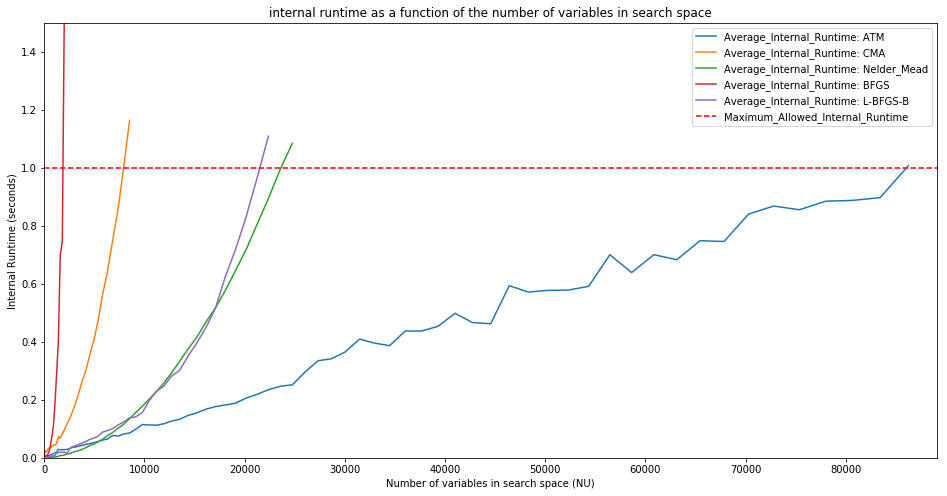

In [8]:


# D = 5
# remaining_evals = 2048
Number_Of_Tests = 3
test_Optimization = 1


Function_Evaluation_Time = 0

print(Function_Evaluation_Time)
def fun(x): 
    t1 = time.time()

    f = np.sum((x-X_Optimal)**2)
    

    global Function_Evaluation_Time 
    Function_Evaluation_Time += (time.time() - t1)
    return f






Run_CMA_Timing_Test = 1
Run_Nelder_Mead_Timing_Test = 1
Run_ATM_Timing_Test = 1
Run_BFGS_Timing_Test = 1
Run_L_BFGS_B_Timing_Test = 1


Dimensionality_test = -1
remaining_evals = 128




# Sqrt3_Dimensionality_Vector = np.linspace(2,10,8)

Time_For_Test = time.time()



print()
print()
print()
print()
print()
print()
print("###############################################################################")
print("Now running the long test - this will take 10-15 minutes")
print("Take into account that each dimensionallity test will take longer than the previous test")
print("###############################################################################")
print()
print()
print()
print()
print()
print()

# Sqrt3_Dimensionality_Vector = np.linspace(2,10,8) ##### This is for the short test
Sqrt3_Dimensionality_Vector = np.linspace(2,50,100) ##### This is for the full test
Maximum_Allowed_Time_For_Evaluation = 1.0


Dimensionality_Vector = np.arange(len(Sqrt3_Dimensionality_Vector))
for i in range(len(Sqrt3_Dimensionality_Vector)): 
    Dimensionality_Vector[i] = int(Sqrt3_Dimensionality_Vector[i]**3)


Maximum_reached_dimensionallity_test_ATM = len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_CMA= len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_Nelder_Mead= len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_BFGS= len(Dimensionality_Vector)
Maximum_reached_dimensionallity_test_L_BFGS_B= len(Dimensionality_Vector)

Average_Internal_Runtime_ATM = np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_Nelder_Mead= np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_CMA= np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_BFGS= np.zeros(len(Dimensionality_Vector))
Average_Internal_Runtime_L_BFGS_B= np.zeros(len(Dimensionality_Vector))


print("Running " + str(len(Dimensionality_Vector)) + " Timing Tests:")
print("Testing the following numbers of optimizable variables:")
print(Dimensionality_Vector)
print()
for Dimensionality_test in range(len(Dimensionality_Vector)):
    D = Dimensionality_Vector[Dimensionality_test]
    print("----------------------------------------------------------")
    print()
    print()
    print("----------------------------------------------------------")
    print("Dimensionality_test ",Dimensionality_test)
    print()

    for test in range (Number_Of_Tests):
      
        print("Initialization Test: ", test)
      
        Function_Evaluation_Time = 0

        x0 = 10*(np.random.rand(D)-0.5)
        X_Optimal = 10*(np.random.rand(D)-0.5)



        ### Timing CMA Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_CMA[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_CMA_Timing_Test = 0
                Maximum_reached_dimensionallity_test_CMA = Dimensionality_test

        if Run_CMA_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization = cma.fmin(fun, x0, 10**-12 ,
                       options=dict( maxfevals=remaining_evals,
                                    verb_log=0, verb_disp=0, verbose=-9))

            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_CMA[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)



        
        
        
        ### Timing Nelder Mead Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_Nelder_Mead[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_Nelder_Mead_Timing_Test = 0
                Maximum_reached_dimensionallity_test_Nelder_Mead = Dimensionality_test
                
        if Run_Nelder_Mead_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization = optimize.fmin(fun, x0, maxfun = remaining_evals ,full_output = False)

            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_Nelder_Mead[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
        
        
        
        
        ### Timing ATM Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_ATM[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_ATM_Timing_Test = 0
                Maximum_reached_dimensionallity_test_ATM = Dimensionality_test
                
        if Run_ATM_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization = Adaptive_Two_Mode_Optimizer.optimize(fun, x0, remaining_evals )

            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_ATM[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
        

        ### Timing BFGS Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_BFGS[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_BFGS_Timing_Test = 0
                Maximum_reached_dimensionallity_test_BFGS = Dimensionality_test
                
        if Run_BFGS_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()

            Best_Parameters_After_Optimization =   optimize.minimize(fun, x0, args=(), method='BFGS',\
                                                                 jac=None, tol=None, callback=None, 
                                                                 options={'gtol': 1e-05, 
                                                                          'eps': 1.4901161193847656e-08, 'maxiter': remaining_evals, 'disp': False, 'return_all': False})

            
#      
#             Best_Parameters_After_Optimization = optimize.minimize(fun, x0, args=(), method='L-BFGS-B', jac=None, bounds=None, tol=None, 
#                                                  callback=None, options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 
#                                                     'gtol': 1e-05, 'eps': 1e-08, 'maxfun': remaining_evals, 'maxiter': remaining_evals, 'iprint': -1, 'maxls': 20})
              
            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_BFGS[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
            
            
            
            
            
             ### Timing L-BFGS-B Aglorithm
        if Dimensionality_test > 0:
            if Average_Internal_Runtime_L_BFGS_B[Dimensionality_test-1] > Maximum_Allowed_Time_For_Evaluation:
                Run_L_BFGS_B_Timing_Test = 0
                Maximum_reached_dimensionallity_test_L_BFGS_B = Dimensionality_test
                
        if Run_L_BFGS_B_Timing_Test:
            Internal_Runtime = np.zeros(Number_Of_Tests)
            Function_Evaluation_Time = 0
            t2 = time.time()


#      
            Best_Parameters_After_Optimization = optimize.minimize(fun, x0, args=(), method='L-BFGS-B', jac=None, bounds=None, tol=None, 
                                                 callback=None, options={'disp': None, 'maxcor': 10, 'ftol': 2.220446049250313e-09, 
                                                    'gtol': 1e-05, 'eps': 1e-08, 'maxfun': remaining_evals, 'maxiter': remaining_evals, 'iprint': -1, 'maxls': 20})
              
            Total_Running_Time = time.time() - t2
            Internal_Runtime[test] = Total_Running_Time - Function_Evaluation_Time
            Average_Internal_Runtime_L_BFGS_B[Dimensionality_test] = np.sum(Internal_Runtime)/(test+1)
            
            
### find the fit parameters


plt.figure(figsize = (16,8))
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_ATM],Average_Internal_Runtime_ATM[:Maximum_reached_dimensionallity_test_ATM])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_CMA],Average_Internal_Runtime_CMA[:Maximum_reached_dimensionallity_test_CMA])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_Nelder_Mead],Average_Internal_Runtime_Nelder_Mead[:Maximum_reached_dimensionallity_test_Nelder_Mead])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_BFGS],Average_Internal_Runtime_BFGS[:Maximum_reached_dimensionallity_test_BFGS])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_L_BFGS_B],Average_Internal_Runtime_L_BFGS_B[:Maximum_reached_dimensionallity_test_L_BFGS_B])



## Add the line of the edge
Maximum_Allowed_Time_Vector = Maximum_Allowed_Time_For_Evaluation*np.ones(len(Dimensionality_Vector))
plt.plot(Dimensionality_Vector,Maximum_Allowed_Time_Vector,'r', linestyle = '--')


# plt.plot(Dimensionality_Vector,y_fit)

plt.title("internal runtime as a function of the number of variables in search space")
plt.xlabel("Number of variables in search space (NU)")
plt.ylabel("Internal Runtime (seconds)")
plt.ylim(0,1.5*Maximum_Allowed_Time_For_Evaluation)
plt.xlim(0,Dimensionality_Vector[np.minimum(Maximum_reached_dimensionallity_test_ATM,len(Dimensionality_Vector)-1)])
# fit_label = 'lLinear fit: y =' + str(p[0]) + 'D + ' + str(p[1])
# plt.legend(['Average_Internal_Runtime', fit_label])
plt.legend(['Average_Internal_Runtime: ATM', 'Average_Internal_Runtime: CMA', 'Average_Internal_Runtime: Nelder_Mead', 'Average_Internal_Runtime: BFGS', 'Average_Internal_Runtime: L-BFGS-B', 'Maximum_Allowed_Internal_Runtime'])





Total_Time_Of_Test = time.time() - Time_For_Test
print("Total_Time_Of_Test = ", Total_Time_Of_Test)

[ 1.14041758e-05 -1.68830126e-03]


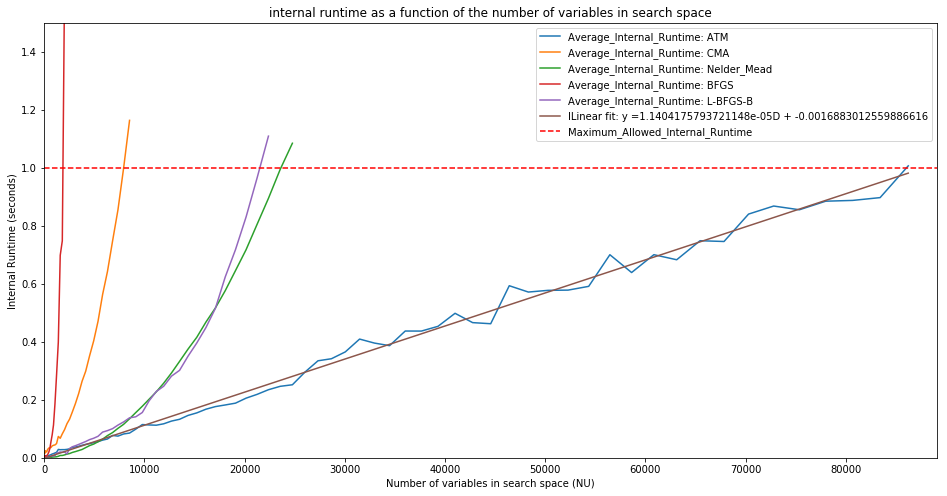

In [9]:
p = np.polyfit(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_ATM], Average_Internal_Runtime_ATM[:Maximum_reached_dimensionallity_test_ATM], 1)
# p1 = np.round(p1,7)
y_Linear_fit = p[0]*Dimensionality_Vector[:Maximum_reached_dimensionallity_test_ATM] + p[1]



fig2 = plt.figure(figsize = (16,8))
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_ATM],Average_Internal_Runtime_ATM[:Maximum_reached_dimensionallity_test_ATM])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_CMA],Average_Internal_Runtime_CMA[:Maximum_reached_dimensionallity_test_CMA])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_Nelder_Mead],Average_Internal_Runtime_Nelder_Mead[:Maximum_reached_dimensionallity_test_Nelder_Mead])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_BFGS],Average_Internal_Runtime_BFGS[:Maximum_reached_dimensionallity_test_BFGS])
plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_L_BFGS_B],Average_Internal_Runtime_L_BFGS_B[:Maximum_reached_dimensionallity_test_L_BFGS_B])


plt.plot(Dimensionality_Vector[:Maximum_reached_dimensionallity_test_ATM],y_Linear_fit)


## Add the line of the edge
Maximum_Allowed_Time_Vector = Maximum_Allowed_Time_For_Evaluation*np.ones(len(Dimensionality_Vector))
plt.plot(Dimensionality_Vector,Maximum_Allowed_Time_Vector,'r', linestyle = '--')


# plt.plot(Dimensionality_Vector,y_fit)

plt.title("internal runtime as a function of the number of variables in search space")
plt.xlabel("Number of variables in search space (NU)")
plt.ylabel("Internal Runtime (seconds)")
plt.ylim(0,1.5*Maximum_Allowed_Time_For_Evaluation)
plt.xlim(0,Dimensionality_Vector[np.minimum(Maximum_reached_dimensionallity_test_ATM,len(Dimensionality_Vector)-1)])
fit_label = 'lLinear fit: y =' + str(p[0]) + 'D + ' + str(p[1])
# plt.legend(['Average_Internal_Runtime', fit_label])
plt.legend(['Average_Internal_Runtime: ATM', 'Average_Internal_Runtime: CMA', 'Average_Internal_Runtime: Nelder_Mead', 'Average_Internal_Runtime: BFGS','Average_Internal_Runtime: L-BFGS-B',fit_label, 'Maximum_Allowed_Internal_Runtime'])
print(p)



Title = 'Timing test for different optimization algorithms with linear fit'
filename = Title + '.png'
fig2.savefig(filename)